In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(AWS_FAST_AI)

In [3]:
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = '/home/ubuntu/Plant/data/'

In [5]:
def get_data(size, bs=64):
    aug_tfms=transforms_top_down
    #aug_tfms=transforms_side_on
    tfms = tfms_from_model(arch, sz=size, aug_tfms=aug_tfms)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs)
    return data

In [6]:
sz=224
bs=64
arch = resnet50
data = get_data(sz)

In [7]:
learn = ConvLearner.pretrained(arch, data) 
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 95%|█████████▌| 57/60 [00:37<00:01,  1.53it/s, loss=11.3]

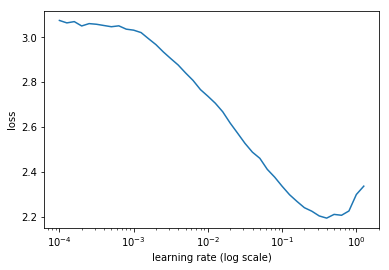

In [8]:
learn.sched.plot()

In [9]:
lr = 0.2
learn.precompute=False
learn.fit(0.2, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError:

[ 0.       1.90689  0.94195  0.6934 ]                     
[ 1.       1.3028   0.97122  0.70799]                     
[ 2.       1.10916  0.59699  0.81632]                     
[ 3.       0.92151  0.51588  0.82812]                      
[ 4.       0.88175  0.46652  0.8441 ]                      



In [10]:
learn.fit(.1, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.61136  0.45115  0.83264]                      
[ 1.       0.56868  0.37666  0.85972]                      
[ 2.       0.51402  0.35188  0.87187]                      



In [ ]:
learn.unfreeze()
lrs=np.array([lr/18,lr/6,lr/2])
learn.fit(lr, 1, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=85), HTML(value='')))

[ 0.       1.6203   1.01791  0.65208]                     
[ 1.       1.33166  5.25027  0.30035]                     
[ 2.       0.90407  5.43903  0.29375]                      
[ 3.       0.63206  1.14058  0.65243]                      
[ 4.       0.46101  0.4842   0.83125]                      
[ 5.       0.57981  1.1121   0.69722]                      
[ 6.       0.63005  0.8622   0.75556]                      
  3%|▎         | 2/60 [00:05<02:39,  2.75s/it, loss=0.625]

In [ ]:
learn.save(f'resnet_50_{sz}')

In [ ]:
learn.sched.plot_loss()